In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Loading the dataset into python environment

In [2]:
tit = pd.read_csv("titanic_dataset.csv")

In [3]:
tit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2) Pre-processing

In [4]:
tit.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


2.2) Filling the missing values  


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

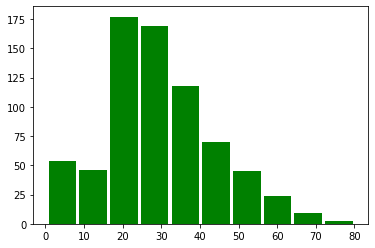

In [6]:
plt.hist(tit["Age"],rwidth = 0.9,color = "green")

In [7]:
tit = tit.drop(["Cabin","Embarked"],axis = 1)
tit["Age"] = tit["Age"].fillna(tit["Age"].median())

In [8]:
tit.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

4) Encoding the categorical columns


In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
tit['Pclass']= le.fit_transform(tit['Pclass'])
tit['Pclass'].unique()

array([2, 0, 1], dtype=int64)

In [10]:
from sklearn.preprocessing import OneHotEncoder
oh = preprocessing.OneHotEncoder()
tit['Sex']= le.fit_transform(tit['Sex'])
tit['Sex'].unique()

array([1, 0])

In [11]:
tit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,2,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500
1,2,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833
2,3,1,2,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000
4,5,0,2,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500


In [12]:
titc = tit.drop(["Name","SibSp","Parch","Parch","Fare","PassengerId","Ticket"],axis = 1)

In [13]:
titc.head()

,Survived,Pclass,Sex,Age
0,0,2,1,22.0
1,1,0,0,38.0
2,1,2,0,26.0
3,1,0,0,35.0
4,0,2,1,35.0


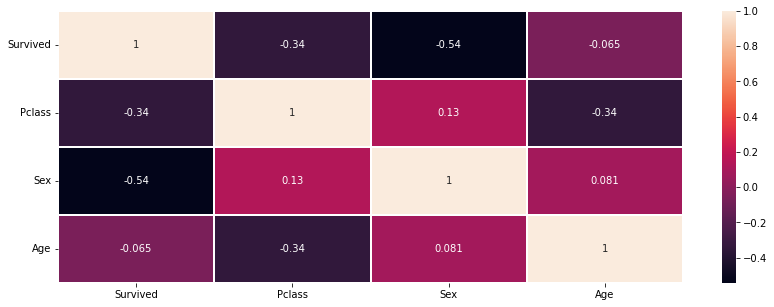

In [14]:
plt.figure(figsize=(14,5))
sns.heatmap(titc.corr(),linewidths=.2, annot=True)
plt.yticks(rotation=0);

In [15]:
#Finding outliers

Text(0.5, 1.0, 'Box plot of Age')

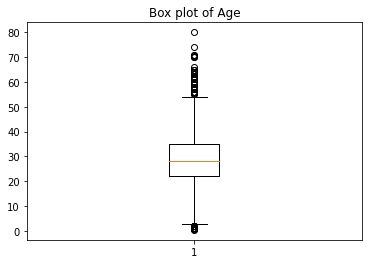

In [16]:
plt.boxplot(titc['Age'])
plt.title('Box plot of Age')

In [17]:
Q1 = np.percentile(titc['Age'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(titc['Age'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(titc['Age'], 75, interpolation = 'midpoint') 
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR 

In [18]:
print(low_lim)
print(up_lim)

2.5
54.5


In [19]:
outlier =[] 
for x in titc['Age']: 
    if ((x> up_lim) or (x<low_lim)): 
         outlier.append(x)
print(outlier)

[2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


In [20]:
ind1 = titc['Age']<low_lim
titc.loc[ind1].index

Int64Index([  7,  16,  78, 119, 164, 172, 183, 205, 297, 305, 340, 381, 386,
            469, 479, 530, 642, 644, 755, 788, 803, 824, 827, 831],
           dtype='int64')

In [21]:
ind2 = titc['Age']>up_lim
titc.loc[ind2].index

Int64Index([ 11,  15,  33,  54,  94,  96, 116, 152, 170, 174, 195, 232, 252,
            268, 275, 280, 326, 366, 438, 456, 467, 483, 487, 492, 493, 545,
            555, 570, 587, 625, 626, 630, 647, 659, 672, 684, 694, 745, 772,
            829, 851, 879],
           dtype='int64')

In [22]:
titc.drop([7,  16,  78, 119, 164, 172, 183, 205, 297, 305, 340, 381, 386,
            469, 479, 530, 642, 644, 755, 788, 803, 824, 827, 831,11,  15,  33,  54,  94,  96, 116, 152, 170, 174, 195, 232, 252,
            268, 275, 280, 326, 366, 438, 456, 467, 483, 487, 492, 493, 545,
            555, 570, 587, 625, 626, 630, 647, 659, 672, 684, 694, 745, 772,
            829, 851, 879],inplace=True)

Text(0.5, 1.0, 'Box plot of Age')

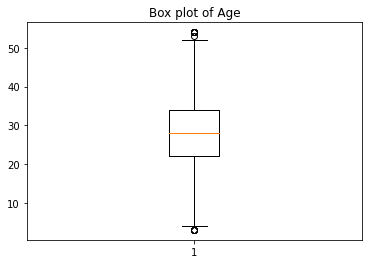

In [23]:
plt.boxplot(titc['Age'])
plt.title('Box plot of Age')

In [24]:
# Model Building

In [25]:
Y = titc['Survived']
X = titc.drop('Survived', axis=1)

In [26]:
X.describe()


,Pclass,Sex,Age
count,825.000000,825.000000,825.000000
mean,1.341818,0.643636,28.515152
std,0.824096,0.479215,10.177256
min,0.000000,0.000000,3.000000
25%,1.000000,0.000000,22.000000
50%,2.000000,1.000000,28.000000
75%,2.000000,1.000000,34.000000
max,2.000000,1.000000,54.000000


In [27]:
#Applying standard Scaling

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25,random_state = 0)


In [29]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[-0.40117559,  0.73301667, -0.05499479],
       [ 0.82013728,  0.73301667, -0.05499479],
       [ 0.82013728,  0.73301667, -0.64351044],
       ...,
       [ 0.82013728,  0.73301667, -0.83968233],
       [-1.62248845,  0.73301667,  0.63160681],
       [ 0.82013728,  0.73301667, -0.05499479]])

# 3) Applying GaussianNB Classifier to predict the surival status


In [30]:
from sklearn.naive_bayes import GaussianNB

In [31]:
classifier = GaussianNB()
classifier.fit(X_train,Y_train)

GaussianNB()

In [32]:
Y_pred = classifier.predict(X_test)

In [33]:
Y_pred

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_test,Y_pred)
accuracy_score(Y_test,Y_pred)
cm

array([[103,  24],
       [ 18,  62]], dtype=int64)

In [35]:
accuracy_score(Y_test,Y_pred)

0.7971014492753623

# 3) Applying BernoulliNB Classifier to predict the surival status


In [36]:
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train,Y_train)


BernoulliNB()

In [37]:
Y_pred = classifier.predict(X_test)

In [38]:
cm = confusion_matrix(Y_test,Y_pred)
cm

array([[110,  17],
       [ 19,  61]], dtype=int64)

In [39]:
accuracy_score(Y_test,Y_pred)

0.8260869565217391

In [40]:
# So by applying BernoulliNB Classifier we could get an accuracy_score of 0.83.